In [1]:
import mdtraj as md
import numpy as np
import pickle
import os
from tqdm import tqdm_notebook
from simtk.openmm import app
from simtk.openmm import unit
import matplotlib.pyplot as plt


## Load htf and trajs for analysis

In [2]:
outdir = "/data/chodera/zhangi/perses_benchmark/neq/15/84"
outdir_rest = "/data/chodera/zhangi/perses_benchmark/neq/14/84"
i = 84
phase = 'complex'
cycle = 0

In [3]:
htf = pickle.load(open(os.path.join(outdir, f"{i}_{phase}.pickle"), "rb"))

In [4]:
with open(os.path.join(outdir, f"{i}_{phase}_{cycle}_forward_neq_new.npy"), 'rb') as f:
    neq_new = np.load(f)

In [5]:
with open(os.path.join(outdir_rest, f"{i}_{phase}_tyr_1ns_snapshots.npy"), 'rb') as f:
    rest_tyr = np.load(f)

In [6]:
modeller = app.Modeller(htf._topology_proposal.new_topology, htf.new_positions(htf.hybrid_positions))
modeller.deleteWater()

In [7]:
top = md.Topology.from_openmm(modeller.topology)

In [8]:
traj = md.Trajectory(np.array(neq_new), top)


In [9]:
def new_positions(hybrid_positions):
    n_atoms_new = htf._topology_proposal.n_atoms_new
    hybrid_indices = [htf._new_to_hybrid_map[idx] for idx in range(n_atoms_new)]
    return hybrid_positions[hybrid_indices, :]
    
def old_positions(hybrid_positions):
    n_atoms_old = htf._topology_proposal.n_atoms_old
    hybrid_indices = [htf._old_to_hybrid_map[idx] for idx in range(n_atoms_old)]
    return hybrid_positions[hybrid_indices, :]

def make_traj(outdir, htf, i, phase, name, endstate, is_old=True):
    with open(os.path.join(outdir, f"{i}_{phase}_{name}_1ns_snapshots.npy"), "rb") as f:
        cache = np.load(f)
    if is_old:
        old_pos = np.zeros(shape=(100, htf._topology_proposal.old_topology.getNumAtoms(), 3))
        for j, pos in tqdm_notebook(enumerate(cache)):
            old_pos[j] = old_positions(unit.Quantity(pos, unit=unit.nanometers)).value_in_unit_system(unit.md_unit_system)
        
        traj = md.Trajectory(old_pos, md.Topology.from_openmm(htf._topology_proposal.old_topology))
    else:
        new_pos = np.zeros(shape=(100, htf._topology_proposal.new_topology.getNumAtoms(), 3))
        for j, pos in tqdm_notebook(enumerate(cache)):
            new_pos[j] = new_positions(unit.Quantity(pos, unit=unit.nanometers)).value_in_unit_system(unit.md_unit_system)
        
        traj = md.Trajectory(new_pos, md.Topology.from_openmm(htf._topology_proposal.new_topology))
        
    box_vectors = np.array([val.value_in_unit_system(unit.md_unit_system) for val in htf.hybrid_system.getDefaultPeriodicBoxVectors()])
    vectors = np.array([box_vectors]) 
           
    # Set unit cell vectors in traj 
    traj.unitcell_vectors = np.repeat(vectors, 100, axis=0)
    traj.image_molecules(inplace=True)
    
    traj = traj.remove_solvent(exclude=['Na+', 'Cl-'])
    
    return traj
       

In [10]:
name = "tyr"
endstate = 1
is_old = False
traj_rest = make_traj(outdir_rest, htf, i, phase, name, endstate, is_old)

<ipython-input-9-f41d78fd9e74>:22: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for j, pos in tqdm_notebook(enumerate(cache)):


0it [00:00, ?it/s]

ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


In [11]:
traj

<mdtraj.Trajectory with 100 frames, 16305 atoms, 1299 residues, without unitcells at 0x2b955fffc040>

In [12]:
traj_rest

<mdtraj.Trajectory with 100 frames, 16303 atoms, 1297 residues, and unitcells at 0x2b957168b3a0>

(array([41.,  1.,  0.,  0.,  0.,  0.,  0.,  2., 36., 20.]),
 array([-3.1062012 , -2.4820921 , -1.8579831 , -1.2338741 , -0.60976505,
         0.01434398,  0.638453  ,  1.262562  ,  1.8866711 ,  2.51078   ,
         3.1348891 ], dtype=float32),
 <BarContainer object of 10 artists>)

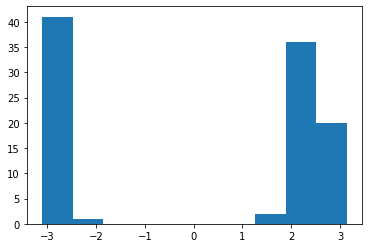

In [13]:
plt.hist(md.compute_dihedrals(traj_rest, [[2607, 2609, 2612, 2613]])) # TYR501 chi1

(-3.0, 3.0)

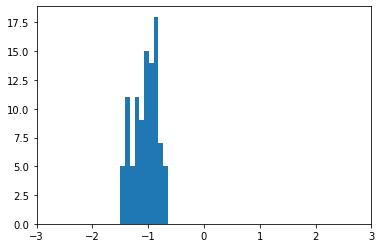

In [14]:
plt.hist(md.compute_dihedrals(traj_rest, [[3492, 3494, 3496, 3499]])) # HIS34 chi1
plt.xlim([-3, 3])

(-3.0, 3.0)

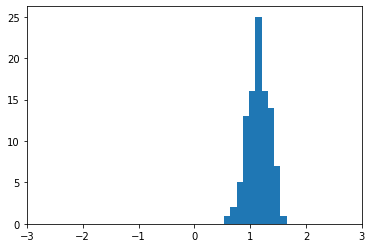

In [15]:
plt.hist(md.compute_dihedrals(traj_rest, [[8502, 8504, 8507, 8509]])) # LEU351 chi2
plt.xlim([-3, 3])

In [17]:
with open(os.path.join(outdir_rest, f"{i}_{phase}_tyr_1ns_snapshots_2000K.npy"), 'rb') as f:
    rest_tyr_2000 = np.load(f)

In [18]:
name = "tyr"
endstate = 1
is_old = False
traj_rest_2000 = make_traj(outdir_rest, htf, i, phase, name, endstate, is_old)

<ipython-input-9-f41d78fd9e74>:22: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for j, pos in tqdm_notebook(enumerate(cache)):


0it [00:00, ?it/s]

ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


(array([41.,  1.,  0.,  0.,  0.,  0.,  0.,  2., 36., 20.]),
 array([-3.1062012 , -2.4820921 , -1.8579831 , -1.2338741 , -0.60976505,
         0.01434398,  0.638453  ,  1.262562  ,  1.8866711 ,  2.51078   ,
         3.1348891 ], dtype=float32),
 <BarContainer object of 10 artists>)

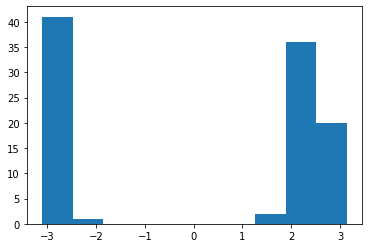

In [19]:
plt.hist(md.compute_dihedrals(traj_rest_2000, [[2607, 2609, 2612, 2613]])) # TYR501 chi1

(-3.0, 3.0)

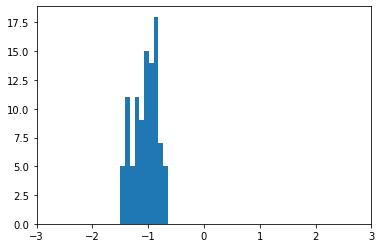

In [20]:
plt.hist(md.compute_dihedrals(traj_rest_2000, [[3492, 3494, 3496, 3499]])) # HIS34 chi1
plt.xlim([-3, 3])

(-3.0, 3.0)

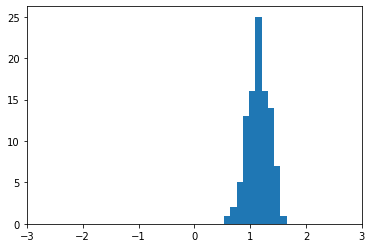

In [21]:
plt.hist(md.compute_dihedrals(traj_rest_2000, [[8502, 8504, 8507, 8509]])) # LEU351 chi2
plt.xlim([-3, 3])

## Determine all residues within 7 ang of Y501

In [14]:
tyr_atoms = []
for atom in top.atoms:
    if atom.residue.resSeq == 501 and atom.residue.name == 'TYR':
        print(atom, atom.residue.resSeq, atom.index)
        tyr_atoms.append(atom.index)

TYR501-N 501 2605
TYR501-H 501 2606
TYR501-CA 501 2607
TYR501-HA 501 2608
TYR501-CB 501 2609
TYR501-HB2 501 2610
TYR501-HB3 501 2611
TYR501-CG 501 2612
TYR501-CD1 501 2613
TYR501-HD1 501 2614
TYR501-CE1 501 2615
TYR501-HE1 501 2616
TYR501-CZ 501 2617
TYR501-OH 501 2618
TYR501-HH 501 2619
TYR501-CE2 501 2620
TYR501-HE2 501 2621
TYR501-CD2 501 2622
TYR501-HD2 501 2623
TYR501-C 501 2624
TYR501-O 501 2625


In [14]:
protein_atoms = top.select("protein")

In [15]:
for atom in top.atoms:
    if atom.index in protein_atoms:
        print(atom)

ACE332-H1
ACE332-CH3
ACE332-H2
ACE332-H3
ACE332-C
ACE332-O
THR333-N
THR333-H
THR333-CA
THR333-HA
THR333-CB
THR333-HB
THR333-CG2
THR333-HG21
THR333-HG22
THR333-HG23
THR333-OG1
THR333-HG1
THR333-C
THR333-O
ASN334-N
ASN334-H
ASN334-CA
ASN334-HA
ASN334-CB
ASN334-HB2
ASN334-HB3
ASN334-CG
ASN334-OD1
ASN334-ND2
ASN334-HD21
ASN334-HD22
ASN334-C
ASN334-O
LEU335-N
LEU335-H
LEU335-CA
LEU335-HA
LEU335-CB
LEU335-HB2
LEU335-HB3
LEU335-CG
LEU335-HG
LEU335-CD1
LEU335-HD11
LEU335-HD12
LEU335-HD13
LEU335-CD2
LEU335-HD21
LEU335-HD22
LEU335-HD23
LEU335-C
LEU335-O
CYS336-N
CYS336-H
CYS336-CA
CYS336-HA
CYS336-CB
CYS336-HB2
CYS336-HB3
CYS336-SG
CYS336-C
CYS336-O
PRO337-N
PRO337-CD
PRO337-HD2
PRO337-HD3
PRO337-CG
PRO337-HG2
PRO337-HG3
PRO337-CB
PRO337-HB2
PRO337-HB3
PRO337-CA
PRO337-HA
PRO337-C
PRO337-O
PHE338-N
PHE338-H
PHE338-CA
PHE338-HA
PHE338-CB
PHE338-HB2
PHE338-HB3
PHE338-CG
PHE338-CD1
PHE338-HD1
PHE338-CE1
PHE338-HE1
PHE338-CZ
PHE338-HZ
PHE338-CE2
PHE338-HE2
PHE338-CD2
PHE338-HD2
PHE338-C
PHE338-O
GLY

TRP69-CD2
TRP69-C
TRP69-O
SER70-N
SER70-H
SER70-CA
SER70-HA
SER70-CB
SER70-HB2
SER70-HB3
SER70-OG
SER70-HG
SER70-C
SER70-O
ALA71-N
ALA71-H
ALA71-CA
ALA71-HA
ALA71-CB
ALA71-HB1
ALA71-HB2
ALA71-HB3
ALA71-C
ALA71-O
PHE72-N
PHE72-H
PHE72-CA
PHE72-HA
PHE72-CB
PHE72-HB2
PHE72-HB3
PHE72-CG
PHE72-CD1
PHE72-HD1
PHE72-CE1
PHE72-HE1
PHE72-CZ
PHE72-HZ
PHE72-CE2
PHE72-HE2
PHE72-CD2
PHE72-HD2
PHE72-C
PHE72-O
LEU73-N
LEU73-H
LEU73-CA
LEU73-HA
LEU73-CB
LEU73-HB2
LEU73-HB3
LEU73-CG
LEU73-HG
LEU73-CD1
LEU73-HD11
LEU73-HD12
LEU73-HD13
LEU73-CD2
LEU73-HD21
LEU73-HD22
LEU73-HD23
LEU73-C
LEU73-O
LYS74-N
LYS74-H
LYS74-CA
LYS74-HA
LYS74-CB
LYS74-HB2
LYS74-HB3
LYS74-CG
LYS74-HG2
LYS74-HG3
LYS74-CD
LYS74-HD2
LYS74-HD3
LYS74-CE
LYS74-HE2
LYS74-HE3
LYS74-NZ
LYS74-HZ1
LYS74-HZ2
LYS74-HZ3
LYS74-C
LYS74-O
GLU75-N
GLU75-H
GLU75-CA
GLU75-HA
GLU75-CB
GLU75-HB2
GLU75-HB3
GLU75-CG
GLU75-HG2
GLU75-HG3
GLU75-CD
GLU75-OE1
GLU75-OE2
GLU75-C
GLU75-O
GLN76-N
GLN76-H
GLN76-CA
GLN76-HA
GLN76-CB
GLN76-HB2
GLN76-HB3
GLN76-CG
GLN76

TRP165-HB2
TRP165-HB3
TRP165-CG
TRP165-CD1
TRP165-HD1
TRP165-NE1
TRP165-HE1
TRP165-CE2
TRP165-CZ2
TRP165-HZ2
TRP165-CH2
TRP165-HH2
TRP165-CZ3
TRP165-HZ3
TRP165-CE3
TRP165-HE3
TRP165-CD2
TRP165-C
TRP165-O
GLU166-N
GLU166-H
GLU166-CA
GLU166-HA
GLU166-CB
GLU166-HB2
GLU166-HB3
GLU166-CG
GLU166-HG2
GLU166-HG3
GLU166-CD
GLU166-OE1
GLU166-OE2
GLU166-C
GLU166-O
SER167-N
SER167-H
SER167-CA
SER167-HA
SER167-CB
SER167-HB2
SER167-HB3
SER167-OG
SER167-HG
SER167-C
SER167-O
TRP168-N
TRP168-H
TRP168-CA
TRP168-HA
TRP168-CB
TRP168-HB2
TRP168-HB3
TRP168-CG
TRP168-CD1
TRP168-HD1
TRP168-NE1
TRP168-HE1
TRP168-CE2
TRP168-CZ2
TRP168-HZ2
TRP168-CH2
TRP168-HH2
TRP168-CZ3
TRP168-HZ3
TRP168-CE3
TRP168-HE3
TRP168-CD2
TRP168-C
TRP168-O
ARG169-N
ARG169-H
ARG169-CA
ARG169-HA
ARG169-CB
ARG169-HB2
ARG169-HB3
ARG169-CG
ARG169-HG2
ARG169-HG3
ARG169-CD
ARG169-HD2
ARG169-HD3
ARG169-NE
ARG169-HE
ARG169-CZ
ARG169-NH1
ARG169-HH11
ARG169-HH12
ARG169-NH2
ARG169-HH21
ARG169-HH22
ARG169-C
ARG169-O
SER170-N
SER170-H
SER170-CA
SER1

TRP477-CD2
TRP477-C
TRP477-O
TRP478-N
TRP478-H
TRP478-CA
TRP478-HA
TRP478-CB
TRP478-HB2
TRP478-HB3
TRP478-CG
TRP478-CD1
TRP478-HD1
TRP478-NE1
TRP478-HE1
TRP478-CE2
TRP478-CZ2
TRP478-HZ2
TRP478-CH2
TRP478-HH2
TRP478-CZ3
TRP478-HZ3
TRP478-CE3
TRP478-HE3
TRP478-CD2
TRP478-C
TRP478-O
GLU479-N
GLU479-H
GLU479-CA
GLU479-HA
GLU479-CB
GLU479-HB2
GLU479-HB3
GLU479-CG
GLU479-HG2
GLU479-HG3
GLU479-CD
GLU479-OE1
GLU479-OE2
GLU479-C
GLU479-O
MET480-N
MET480-H
MET480-CA
MET480-HA
MET480-CB
MET480-HB2
MET480-HB3
MET480-CG
MET480-HG2
MET480-HG3
MET480-SD
MET480-CE
MET480-HE1
MET480-HE2
MET480-HE3
MET480-C
MET480-O
LYS481-N
LYS481-H
LYS481-CA
LYS481-HA
LYS481-CB
LYS481-HB2
LYS481-HB3
LYS481-CG
LYS481-HG2
LYS481-HG3
LYS481-CD
LYS481-HD2
LYS481-HD3
LYS481-CE
LYS481-HE2
LYS481-HE3
LYS481-NZ
LYS481-HZ1
LYS481-HZ2
LYS481-HZ3
LYS481-C
LYS481-O
ARG482-N
ARG482-H
ARG482-CA
ARG482-HA
ARG482-CB
ARG482-HB2
ARG482-HB3
ARG482-CG
ARG482-HG2
ARG482-HG3
ARG482-CD
ARG482-HD2
ARG482-HD3
ARG482-NE
ARG482-HE
ARG482-CZ
ARG

GLU571-HG3
GLU571-CD
GLU571-OE1
GLU571-OE2
GLU571-C
GLU571-O
ASN572-N
ASN572-H
ASN572-CA
ASN572-HA
ASN572-CB
ASN572-HB2
ASN572-HB3
ASN572-CG
ASN572-OD1
ASN572-ND2
ASN572-HD21
ASN572-HD22
ASN572-C
ASN572-O
VAL573-N
VAL573-H
VAL573-CA
VAL573-HA
VAL573-CB
VAL573-HB
VAL573-CG1
VAL573-HG11
VAL573-HG12
VAL573-HG13
VAL573-CG2
VAL573-HG21
VAL573-HG22
VAL573-HG23
VAL573-C
VAL573-O
VAL574-N
VAL574-H
VAL574-CA
VAL574-HA
VAL574-CB
VAL574-HB
VAL574-CG1
VAL574-HG11
VAL574-HG12
VAL574-HG13
VAL574-CG2
VAL574-HG21
VAL574-HG22
VAL574-HG23
VAL574-C
VAL574-O
GLY575-N
GLY575-H
GLY575-CA
GLY575-HA2
GLY575-HA3
GLY575-C
GLY575-O
ALA576-N
ALA576-H
ALA576-CA
ALA576-HA
ALA576-CB
ALA576-HB1
ALA576-HB2
ALA576-HB3
ALA576-C
ALA576-O
LYS577-N
LYS577-H
LYS577-CA
LYS577-HA
LYS577-CB
LYS577-HB2
LYS577-HB3
LYS577-CG
LYS577-HG2
LYS577-HG3
LYS577-CD
LYS577-HD2
LYS577-HD3
LYS577-CE
LYS577-HE2
LYS577-HE3
LYS577-NZ
LYS577-HZ1
LYS577-HZ2
LYS577-HZ3
LYS577-C
LYS577-O
ASN578-N
ASN578-H
ASN578-CA
ASN578-HA
ASN578-CB
ASN578-HB2
AS

In [16]:
traj_84 = traj[84]


In [17]:
neighbors = md.compute_neighbors(traj_84, 0.7, tyr_atoms, haystack_indices=protein_atoms)

<ipython-input-17-2b45ee2e5306>:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  neighbors = md.compute_neighbors(traj_84, 0.7, tyr_atoms, haystack_indices=protein_atoms)


In [18]:
neighbors_residues = set([atom.residue for atom in top.atoms if atom.index in neighbors[0]])

In [19]:
len(neighbors_residues)

38

In [20]:
neighbors_residues

{ARG357,
 ARG403,
 ASN330,
 ASN437,
 ASN439,
 ASN448,
 ASP355,
 ASP38,
 GLN42,
 GLN498,
 GLN506,
 GLU37,
 GLY326,
 GLY352,
 GLY354,
 GLY404,
 GLY447,
 GLY496,
 GLY502,
 GLY504,
 HIS34,
 LEU351,
 LEU45,
 LYS353,
 PHE356,
 PHE497,
 PRO499,
 PRO507,
 SER443,
 SER494,
 THR324,
 THR500,
 TYR41,
 TYR449,
 TYR495,
 TYR501,
 TYR505,
 VAL503}

In [67]:
# Make map of residue to atom indices
d_map = {}
for res in neighbors_residues:
    d_map[f"{res.name}-{res.resSeq}"] = [atom.index for atom in res.atoms]

## Compute all angles

In [21]:
indices_phi_neq, angles_phi_neq = md.compute_phi(traj_84)
indices_psi_neq, angles_psi_neq = md.compute_psi(traj_84)
indices_chi1_neq, angles_chi1_neq = md.compute_chi1(traj_84)
indices_chi2_neq, angles_chi2_neq = md.compute_chi2(traj_84)
indices_chi3_neq, angles_chi3_neq = md.compute_chi3(traj_84)
indices_chi4_neq, angles_chi4_neq = md.compute_chi4(traj_84)

In [22]:
indices_phi_rest, angles_phi_rest = md.compute_phi(traj_rest[84])
indices_psi_rest, angles_psi_rest = md.compute_psi(traj_rest[84])
indices_chi1_rest, angles_chi1_rest = md.compute_chi1(traj_rest[84])
indices_chi2_rest, angles_chi2_rest = md.compute_chi2(traj_rest[84])
indices_chi3_rest, angles_chi3_rest = md.compute_chi3(traj_rest[84])
indices_chi4_rest, angles_chi4_rest = md.compute_chi4(traj_rest[84])

In [41]:
# Check that the angles computed in the same order for neq vs rest
for index_neq, index_rest in zip(indices_chi1_neq, indices_chi1_rest):
    assert np.array_equal(index_neq, index_rest)

## Get residues that have diff angles in neq vs rest

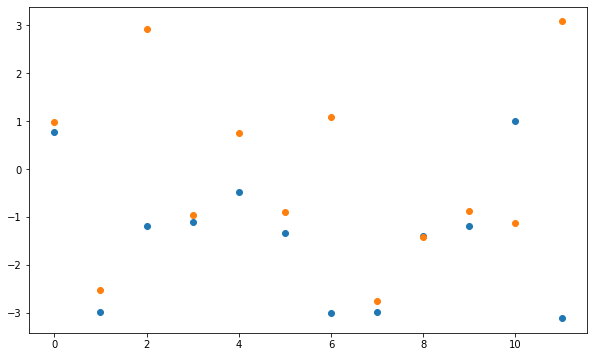

In [28]:
plt.figure(figsize=(10, 6))
# plt.scatter(list(range(angles_chi1_neq.shape[1])), angles_chi1_neq[:10])
# plt.scatter(list(range(angles_chi1_rest.shape[1])), angles_chi1_rest[:10])
plt.scatter(list(range(12)), angles_chi1_neq[0][:12])
plt.scatter(list(range(12)), angles_chi1_rest[0][:12])

In [35]:
# Get list of indices (angle_type, angle_index) where the angles differ between neq and rest
angles_neq_all = [angles_phi_neq, angles_psi_neq, angles_chi1_neq, angles_chi2_neq, angles_chi3_neq, angles_chi4_neq]
angles_rest_all = [angles_phi_rest, angles_psi_rest, angles_chi1_rest, angles_chi2_rest, angles_chi3_rest, angles_chi4_rest]
indices_neq_all = [indices_phi_neq, indices_psi_neq, indices_chi1_neq, indices_chi2_neq, indices_chi3_neq, indices_chi4_neq]
indices_rest_all = [indices_phi_rest, indices_psi_rest, indices_chi1_rest, indices_chi2_rest, indices_chi3_rest, indices_chi4_rest]

indices = []
for i, (angles_neq, angles_rest) in enumerate(zip(angles_neq_all, angles_rest_all)):
    for j, (angle_neq, angle_rest) in enumerate(zip(angles_neq[0], angles_rest[0])):
        if abs(angle_neq - angle_rest) > 1 and  abs(angle_neq - angle_rest) < 5.5:
            indices.append((i, j))
            print (j, angle_neq, angle_rest)
        

45 -2.1758277 -1.0891583
143 2.7970521 -2.1962984
183 -1.2017725 -2.4060075
444 -1.0571394 -2.4955716
520 -2.910372 -1.116749
525 -1.4226812 -2.5981688
604 -1.31844 -2.5742507
621 -2.5402362 -1.4371685
712 -1.6118503 -2.970544
808 -2.5472023 -1.3448025
811 -1.1601166 -2.788146
899 -1.3118947 -2.6022544
44 1.8095012 0.60660565
117 -0.9331818 0.42419508
184 0.03882101 1.7473212
185 2.4307532 -2.9468768
194 2.7232132 -0.63305116
307 2.3340743 -3.1126418
512 -2.4717782 3.026119
519 1.6098584 -0.09562514
620 -0.04798288 -1.1075746
667 2.342279 -3.0164428
711 0.23773849 1.2584972
810 1.2909157 2.5874977
2 -1.1827291 2.9207656
4 -0.484596 0.75696516
6 -3.000346 1.0934399
10 0.99446917 -1.1379182
17 -2.8637314 -1.4332913
19 -1.1955476 -3.0156386
33 -2.7369778 1.4342827
37 -1.3689082 -3.0771816
43 -2.9636302 1.0967019
96 -1.0202781 1.1572798
100 3.1178565 1.090824
108 -2.497285 -1.1359212
120 1.3741249 -0.7527011
121 0.876113 -3.060562
133 1.3671274 -0.9969664
140 -0.79652226 -2.937287
156 -1.0

In [34]:
len(indices)

356

In [70]:
# Make map of angle types to indices
d_map_angles = {0: "phi", 1: "psi", 2: "chi1", 3: "chi2", 4: "chi3", 5: "chi4"}


In [71]:
# Get residue names for the angles that are changing
for angle_type, angle_index in indices:
    dihedral_atoms = indices_neq_all[angle_type][angle_index]
    residues = []
    for atom in dihedral_atoms:
        for res, atoms in d_map.items():
            if atom in atoms:
                residues.append(res)
                continue
    residues = set(residues)
    if residues:
        print(dihedral_atoms, residues, d_map_angles[angle_type], angles_neq_all[angle_type][0][angle_index], angles_rest_all[angle_type][0][angle_index])
            
                
                

[2501 2503 2505 2508] {'SER-494'} chi1 -0.79652226 -2.937287
[3492 3494 3496 3499] {'HIS-34'} chi1 3.1307752 -0.87013483
[3549 3551 3553 3556] {'ASP-38'} chi1 -3.1302636 -1.3445787
[2607 2609 2612 2613] {'TYR-501'} chi2 0.15153733 -2.8084686
[3494 3496 3499 3500] {'HIS-34'} chi2 -1.7509366 1.2608483
[3623 3625 3628 3631] {'GLN-42'} chi2 2.9723744 -1.1237237
[8502 8504 8507 8509] {'LEU-351'} chi2 -2.890979 0.98762953
[8528 8530 8533 8536] {'LYS-353'} chi2 -2.5135913 -1.3494954
[1091 1094 1097 1100] {'ARG-403'} chi3 -1.2282032 -3.0029073
[3625 3628 3631 3632] {'GLN-42'} chi3 1.2325821 -0.46844092
[1094 1097 1100 1102] {'ARG-403'} chi4 -3.0925028 2.1552489


## Compute all angles for all frames

In [75]:
indices_phi_neq, angles_phi_neq = md.compute_phi(traj)
indices_psi_neq, angles_psi_neq = md.compute_psi(traj)
indices_chi1_neq, angles_chi1_neq = md.compute_chi1(traj)
indices_chi2_neq, angles_chi2_neq = md.compute_chi2(traj)
indices_chi3_neq, angles_chi3_neq = md.compute_chi3(traj)
indices_chi4_neq, angles_chi4_neq = md.compute_chi4(traj)

In [76]:
indices_phi_rest, angles_phi_rest = md.compute_phi(traj_rest)
indices_psi_rest, angles_psi_rest = md.compute_psi(traj_rest)
indices_chi1_rest, angles_chi1_rest = md.compute_chi1(traj_rest)
indices_chi2_rest, angles_chi2_rest = md.compute_chi2(traj_rest)
indices_chi3_rest, angles_chi3_rest = md.compute_chi3(traj_rest)
indices_chi4_rest, angles_chi4_rest = md.compute_chi4(traj_rest)

In [77]:
# Check that the angles computed in the same order for neq vs rest
for index_neq, index_rest in zip(indices_chi1_neq, indices_chi1_rest):
    assert np.array_equal(index_neq, index_rest)

## Get residues that have diff angles in neq vs rest (all frames)

In [79]:
angles_phi_neq.shape

(100, 901)

In [81]:
# Get list of indices (angle_type, angle_index) where the angles differ between neq and rest
angles_neq_all = [angles_phi_neq, angles_psi_neq, angles_chi1_neq, angles_chi2_neq, angles_chi3_neq, angles_chi4_neq]
angles_rest_all = [angles_phi_rest, angles_psi_rest, angles_chi1_rest, angles_chi2_rest, angles_chi3_rest, angles_chi4_rest]
indices_neq_all = [indices_phi_neq, indices_psi_neq, indices_chi1_neq, indices_chi2_neq, indices_chi3_neq, indices_chi4_neq]
indices_rest_all = [indices_phi_rest, indices_psi_rest, indices_chi1_rest, indices_chi2_rest, indices_chi3_rest, indices_chi4_rest]

d_indices = {}
for frame in range(traj.n_frames):
    indices = []
    for i, (angles_neq, angles_rest) in enumerate(zip(angles_neq_all, angles_rest_all)):
        for j, (angle_neq, angle_rest) in enumerate(zip(angles_neq[frame], angles_rest[frame])):
            if abs(angle_neq - angle_rest) > 1 and  abs(angle_neq - angle_rest) < 5.5:
                indices.append((i, j))
    d_indices[frame] = indices
        

In [86]:
# Make map of angle types to indices
d_map_angles = {0: "phi", 1: "psi", 2: "chi1", 3: "chi2", 4: "chi3", 5: "chi4"}


In [93]:
indices_neq_all[0].shape

(901, 4)

In [94]:
# Get residue names for the angles that are changing
for frame, indices in d_indices.items():
    if frame < 10:
        print(f"frame: {frame}") 
        for angle_type, angle_index in indices:
            dihedral_atoms = indices_neq_all[angle_type][angle_index]
            residues = []
            for atom in dihedral_atoms:
                for res, atoms in d_map.items():
                    if atom in atoms:
                        residues.append(res)
                        continue
            residues = set(residues)
            if residues:
                print(dihedral_atoms, residues, d_map_angles[angle_type], angles_neq_all[angle_type][frame][angle_index], angles_rest_all[angle_type][frame][angle_index])
    print("\n")
                
                

frame: 0
[1645 1647 1649 1659] {'ASN-439'} phi -3.0942252 -1.2985766
[1767 1769 1771 1788] {'TYR-449', 'ASN-448'} phi -2.4392295 -1.1274358
[1633 1635 1645 1647] {'ASN-439'} psi 1.0096604 -0.3299049
[1755 1757 1767 1769] {'TYR-449', 'ASN-448'} psi 2.4989758 1.1077328
[3524 3526 3532 3534] {'GLU-37'} psi 0.15064967 -0.91834253
[3492 3494 3496 3499] {'HIS-34'} chi1 -2.341442 -0.8224148
[1610 1612 1615 1616] {'ASN-437'} chi2 -1.9968357 -0.96476066
[1757 1759 1762 1763] {'ASN-448'} chi2 -0.9332709 0.46167135
[2607 2609 2612 2613] {'TYR-501'} chi2 0.5887423 2.672493
[3662 3664 3667 3669] {'LEU-45'} chi2 2.516811 1.081695
[3538 3541 3544 3545] {'GLU-37'} chi3 2.7152863 -2.5718303
[3625 3628 3631 3632] {'GLN-42'} chi3 0.89756536 -0.23767924
[8530 8533 8536 8539] {'LYS-353'} chi3 -0.8463289 1.0474803


frame: 1
[2531 2533 2535 2538] {'TYR-495', 'GLY-496'} phi -2.858503 -1.4653568
[2605 2607 2609 2612] {'TYR-501'} chi1 -0.23595527 -1.2598727
[3492 3494 3496 3499] {'HIS-34'} chi1 -2.5710337 -0.7

In [ ]:
[2501 2503 2505 2508] {'SER-494'} chi1 -0.79652226 -2.937287
[3492 3494 3496 3499] {'HIS-34'} chi1 3.1307752 -0.87013483
[3549 3551 3553 3556] {'ASP-38'} chi1 -3.1302636 -1.3445787
[2607 2609 2612 2613] {'TYR-501'} chi2 0.15153733 -2.8084686
[3494 3496 3499 3500] {'HIS-34'} chi2 -1.7509366 1.2608483
[3623 3625 3628 3631] {'GLN-42'} chi2 2.9723744 -1.1237237
[8502 8504 8507 8509] {'LEU-351'} chi2 -2.890979 0.98762953
[8528 8530 8533 8536] {'LYS-353'} chi2 -2.5135913 -1.3494954
[1091 1094 1097 1100] {'ARG-403'} chi3 -1.2282032 -3.0029073
[3625 3628 3631 3632] {'GLN-42'} chi3 1.2325821 -0.46844092
[1094 1097 1100 1102] {'ARG-403'} chi4 -3.0925028 2.1552489

In [116]:
# Get residue names for the angles that are changing
d_residues = {}
for frame, indices in d_indices.items():
    print(f"frame: {frame}") 
    residues = []
    for angle_type, angle_index in indices:
        dihedral_atoms = indices_neq_all[angle_type][angle_index]
        for atom in dihedral_atoms:
            for res, atoms in d_map.items():
                if atom in atoms:
                    residues.append((res, d_map_angles[angle_type], angle_type, angle_index))
                    continue
    if residues:
        d_residues[frame] = set(residues)
        print(set(residues))
    print("\n")
                
                

frame: 0
{('ASN-439', 'phi', 0, 107), ('ASN-437', 'chi2', 3, 60), ('ASN-439', 'psi', 1, 106), ('TYR-501', 'chi2', 3, 104), ('GLN-42', 'chi3', 4, 36), ('GLU-37', 'psi', 1, 211), ('ASN-448', 'psi', 1, 115), ('ASN-448', 'chi2', 3, 66), ('TYR-449', 'psi', 1, 115), ('ASN-448', 'phi', 0, 116), ('LEU-45', 'chi2', 3, 136), ('GLU-37', 'chi3', 4, 35), ('LYS-353', 'chi3', 4, 112), ('HIS-34', 'chi1', 2, 181), ('TYR-449', 'phi', 0, 116)}


frame: 1
{('ASP-38', 'chi1', 2, 184), ('TYR-501', 'chi2', 3, 104), ('LYS-353', 'chi2', 3, 352), ('GLU-37', 'chi2', 3, 130), ('GLN-498', 'chi3', 4, 25), ('TYR-495', 'phi', 0, 163), ('GLU-37', 'chi1', 2, 183), ('GLU-37', 'chi3', 4, 35), ('GLY-496', 'phi', 0, 163), ('LYS-353', 'chi3', 4, 112), ('HIS-34', 'chi1', 2, 181), ('TYR-501', 'chi1', 2, 146)}


frame: 2
{('ASP-38', 'chi1', 2, 184), ('TYR-501', 'chi2', 3, 104), ('GLN-42', 'chi3', 4, 36), ('GLU-37', 'chi2', 3, 130), ('ASN-439', 'chi2', 3, 61), ('ASN-448', 'chi2', 3, 66), ('ARG-403', 'chi3', 4, 7), ('PRO-499', '

{('ASP-38', 'chi1', 2, 184), ('ASP-355', 'psi', 1, 529), ('VAL-503', 'chi1', 2, 147), ('ARG-403', 'chi4', 5, 6), ('GLU-37', 'chi2', 3, 130), ('GLY-354', 'psi', 1, 529), ('GLU-37', 'chi1', 2, 183), ('GLU-37', 'chi3', 4, 35), ('SER-443', 'chi1', 2, 95), ('LYS-353', 'chi3', 4, 112), ('HIS-34', 'chi1', 2, 181), ('TYR-501', 'chi1', 2, 146)}


frame: 17
{('ASP-38', 'chi1', 2, 184), ('TYR-501', 'chi1', 2, 146), ('GLN-498', 'chi1', 2, 143), ('LYS-353', 'chi2', 3, 352), ('VAL-503', 'chi1', 2, 147), ('THR-324', 'chi1', 2, 438), ('SER-443', 'phi', 0, 110), ('TYR-495', 'psi', 1, 162), ('ARG-403', 'chi3', 4, 7), ('TYR-495', 'phi', 0, 163), ('PRO-499', 'chi1', 2, 144), ('PRO-499', 'chi2', 3, 103), ('SER-443', 'chi1', 2, 95), ('HIS-34', 'chi1', 2, 181), ('ASP-38', 'chi2', 3, 131), ('GLY-496', 'psi', 1, 162), ('GLY-496', 'phi', 0, 163), ('HIS-34', 'chi2', 3, 128)}


frame: 18
{('TYR-501', 'chi2', 3, 104), ('ASN-448', 'psi', 1, 115), ('THR-324', 'chi1', 2, 438), ('TYR-449', 'psi', 1, 115), ('GLY-496', 

{('LEU-351', 'chi2', 3, 351), ('GLN-42', 'chi3', 4, 36), ('ASN-448', 'psi', 1, 115), ('THR-324', 'chi1', 2, 438), ('TYR-449', 'psi', 1, 115), ('ASN-448', 'phi', 0, 116), ('ASP-355', 'psi', 1, 530), ('GLY-496', 'phi', 0, 164), ('GLY-496', 'psi', 1, 162), ('PHE-497', 'psi', 1, 163), ('ARG-403', 'chi3', 4, 7), ('PHE-356', 'psi', 1, 530), ('TYR-505', 'chi2', 3, 105), ('GLY-496', 'phi', 0, 163), ('ASP-38', 'chi1', 2, 184), ('VAL-503', 'chi1', 2, 147), ('ARG-403', 'chi4', 5, 6), ('PHE-497', 'phi', 0, 164), ('TYR-495', 'psi', 1, 162), ('LYS-353', 'chi4', 5, 43), ('HIS-34', 'chi1', 2, 181), ('GLN-498', 'chi1', 2, 143), ('HIS-34', 'chi2', 3, 128), ('ASP-38', 'chi2', 3, 131), ('LYS-353', 'chi2', 3, 352), ('TYR-495', 'phi', 0, 163), ('GLY-496', 'psi', 1, 163), ('TYR-449', 'phi', 0, 116)}


frame: 32
{('TYR-501', 'chi2', 3, 104), ('LEU-351', 'chi2', 3, 351), ('GLN-42', 'chi3', 4, 36), ('THR-324', 'chi1', 2, 438), ('GLY-496', 'psi', 1, 162), ('PHE-497', 'psi', 1, 163), ('ARG-403', 'chi3', 4, 7), ('

{('ASP-38', 'chi1', 2, 184), ('TYR-501', 'chi2', 3, 104), ('LYS-353', 'chi2', 3, 352), ('LEU-351', 'chi2', 3, 351), ('GLN-42', 'chi3', 4, 36), ('PHE-497', 'phi', 0, 164), ('ARG-403', 'chi4', 5, 6), ('SER-443', 'phi', 0, 110), ('ARG-403', 'chi3', 4, 7), ('ASN-330', 'chi2', 3, 339), ('GLN-42', 'chi2', 3, 135), ('GLY-496', 'phi', 0, 164), ('SER-443', 'chi1', 2, 95), ('LYS-353', 'chi4', 5, 43), ('HIS-34', 'chi1', 2, 181), ('TYR-501', 'chi1', 2, 146), ('ASP-38', 'chi2', 3, 131)}


frame: 48
{('TYR-505', 'psi', 1, 171), ('VAL-503', 'psi', 1, 169), ('LEU-351', 'chi2', 3, 351), ('GLN-42', 'chi3', 4, 36), ('GLY-504', 'psi', 1, 171), ('GLU-37', 'chi1', 2, 183), ('LYS-353', 'chi3', 4, 112), ('ARG-403', 'chi3', 4, 7), ('ASN-330', 'chi2', 3, 339), ('LYS-353', 'psi', 1, 527), ('ASP-38', 'chi1', 2, 184), ('GLN-42', 'chi2', 3, 135), ('TYR-505', 'chi1', 2, 148), ('HIS-34', 'chi1', 2, 181), ('GLY-352', 'psi', 1, 527), ('ASN-437', 'chi2', 3, 60), ('LYS-353', 'chi2', 3, 352), ('GLY-502', 'psi', 1, 169), (

{('ASP-38', 'chi1', 2, 184), ('LYS-353', 'chi2', 3, 352), ('LEU-351', 'chi2', 3, 351), ('SER-494', 'chi1', 2, 140), ('TYR-495', 'psi', 1, 162), ('ARG-403', 'chi3', 4, 7), ('TYR-495', 'phi', 0, 163), ('GLN-42', 'chi2', 3, 135), ('LYS-353', 'chi3', 4, 112), ('SER-443', 'chi1', 2, 95), ('LYS-353', 'chi4', 5, 43), ('HIS-34', 'chi1', 2, 181), ('ASP-38', 'chi2', 3, 131), ('GLY-496', 'psi', 1, 162), ('GLY-496', 'phi', 0, 163), ('HIS-34', 'chi2', 3, 128)}


frame: 64
{('TYR-501', 'chi2', 3, 104), ('LEU-351', 'chi2', 3, 351), ('GLN-42', 'chi3', 4, 36), ('TYR-495', 'chi2', 3, 100), ('GLY-496', 'psi', 1, 162), ('LYS-353', 'chi3', 4, 112), ('ARG-403', 'chi3', 4, 7), ('ASN-330', 'chi2', 3, 339), ('ASP-38', 'chi1', 2, 184), ('SER-494', 'chi1', 2, 140), ('TYR-495', 'psi', 1, 162), ('PRO-499', 'chi2', 3, 103), ('GLN-42', 'chi2', 3, 135), ('LYS-353', 'chi4', 5, 43), ('HIS-34', 'chi1', 2, 181), ('ASP-38', 'chi2', 3, 131), ('HIS-34', 'chi2', 3, 128), ('LYS-353', 'chi2', 3, 352), ('SER-443', 'chi1', 2, 95

{('TYR-501', 'chi2', 3, 104), ('LYS-353', 'chi2', 3, 352), ('GLN-498', 'chi1', 2, 143), ('VAL-503', 'chi1', 2, 147), ('LEU-351', 'chi2', 3, 351), ('SER-494', 'chi1', 2, 140), ('THR-324', 'chi1', 2, 438), ('GLN-498', 'chi2', 3, 102), ('TYR-495', 'psi', 1, 162), ('ARG-403', 'chi3', 4, 7), ('ASN-330', 'chi2', 3, 339), ('PRO-499', 'chi2', 3, 103), ('HIS-34', 'chi1', 2, 181), ('GLY-496', 'psi', 1, 162), ('ASP-38', 'chi2', 3, 131)}


frame: 84
{('ASP-38', 'chi1', 2, 184), ('TYR-501', 'chi2', 3, 104), ('LYS-353', 'chi2', 3, 352), ('LEU-351', 'chi2', 3, 351), ('GLN-42', 'chi3', 4, 36), ('ARG-403', 'chi4', 5, 6), ('SER-494', 'chi1', 2, 140), ('ARG-403', 'chi3', 4, 7), ('GLN-42', 'chi2', 3, 135), ('HIS-34', 'chi1', 2, 181), ('HIS-34', 'chi2', 3, 128)}


frame: 85
{('ASP-38', 'chi1', 2, 184), ('TYR-501', 'chi2', 3, 104), ('LYS-353', 'chi2', 3, 352), ('LEU-351', 'chi2', 3, 351), ('GLN-42', 'chi3', 4, 36), ('ARG-403', 'chi4', 5, 6), ('SER-494', 'chi1', 2, 140), ('GLN-506', 'chi3', 4, 26), ('ARG-403

In [117]:
residue_sets = list(d_residues.values())
residue_sets[0].intersection(*residue_sets)

set()

In [118]:
d_counts = {}
for frame, residues in d_residues.items():
    for residue in residues:
        if residue not in d_counts:
            d_counts[residue] = 1
        else:
            d_counts[residue] += 1

In [149]:
pairs = []
for res, count, in d_counts.items():
    if count > 60:
        print(res, count)
        pairs.append(res)

('TYR-501', 'chi2', 3, 104) 78
('HIS-34', 'chi1', 2, 181) 98
('ASP-38', 'chi1', 2, 184) 84
('LYS-353', 'chi2', 3, 352) 77
('ARG-403', 'chi3', 4, 7) 93
('HIS-34', 'chi2', 3, 128) 72
('SER-443', 'chi1', 2, 95) 63
('LEU-351', 'chi2', 3, 351) 69


## Cluster the traj indices based on the angles

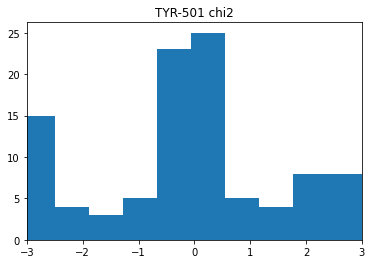

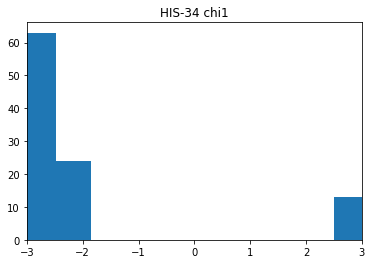

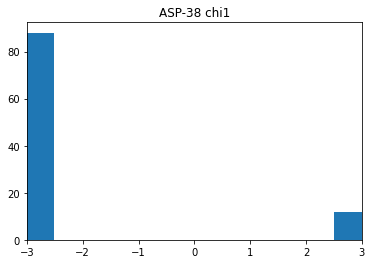

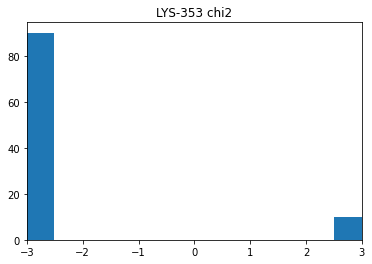

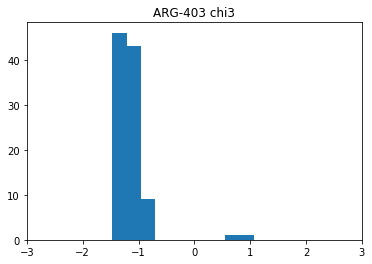

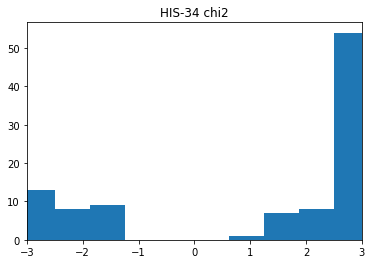

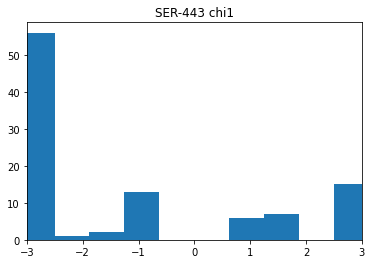

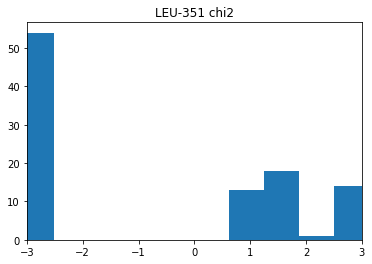

In [152]:
for res_name, angle_name, angle_type, angle_index in pairs:
    plt.hist(angles_neq_all[angle_type][:, angle_index])
    plt.title(f"{res_name} {angle_name}")
    plt.xlim([-3, 3])
    plt.show()

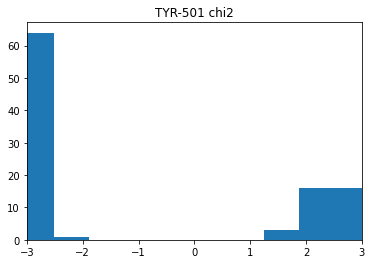

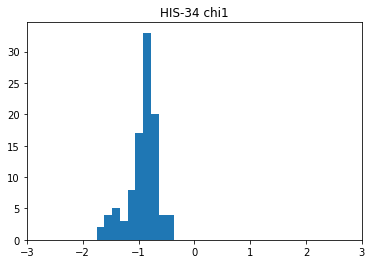

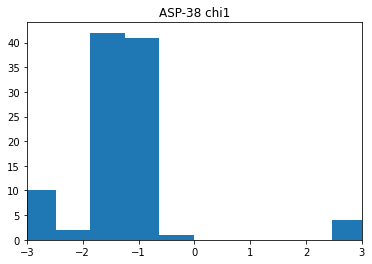

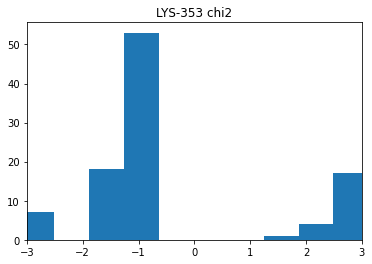

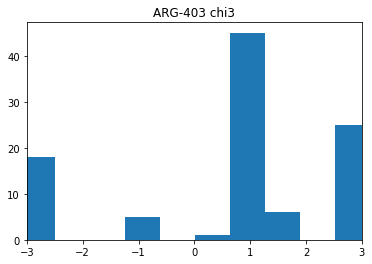

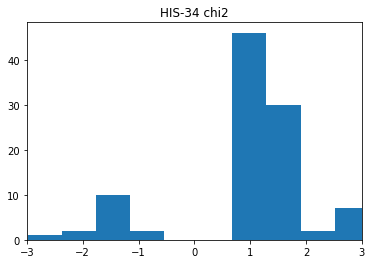

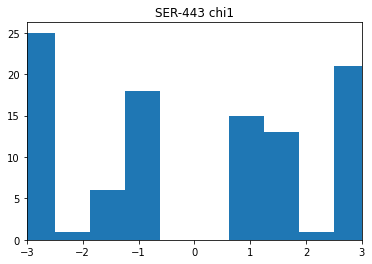

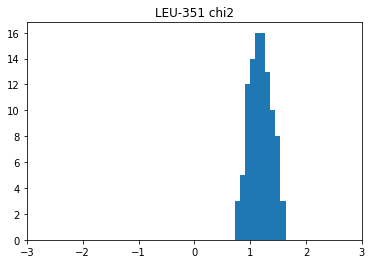

In [153]:
for res_name, angle_name, angle_type, angle_index in pairs:
    plt.hist(angles_rest_all[angle_type][:, angle_index])
    plt.title(f"{res_name} {angle_name}")
    plt.xlim([-3, 3])
    plt.show()

In [140]:
def cluster_V1(angle):
    if angle <= -2 or angle > 2:
        return -3
    elif angle > -2 and angle < 0:
        return -1
    else:
        return 1

def cluster_V2(angle):
    if angle <= -1.5 or angle > 1.5:
        return -3
    else:
        return 0

In [154]:
d_clusters_neq_all = {}
d_clusters_rest_all = {}
for res_name, angle_name, angle_type, angle_index in pairs:
    
    cluster = cluster_V2 if res_name == 'TYR-501' else cluster_V1
    
    d_clusters_neq = {-3: [], -1: [], 0: [], 1: []}
    for i, angle in enumerate(angles_neq_all[angle_type][:, angle_index]):
        d_clusters_neq[cluster(angle)].append(i)
    d_clusters_neq_all[(res_name, angle_name)] = d_clusters_neq

    d_clusters_rest = {-3: [], -1: [], 0: [], 1: []}
    for i, angle in enumerate(angles_rest_all[angle_type][:, angle_index]):
        d_clusters_rest[cluster(angle)].append(i)
    d_clusters_rest_all[(res_name, angle_name)] = d_clusters_rest

## Plot the work values for each cluster

In [132]:
from perses.analysis.analysis import Analysis
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pymbar
%matplotlib inline
import os
import itertools
from tqdm import tqdm_notebook
import pandas as pd
import tqdm
import warnings
warnings.filterwarnings('ignore')
from simtk.openmm import unit
from openmmtools.constants import kB
KT_KCALMOL = kB * 300 * unit.kelvin / unit.kilocalories_per_mole
import pandas as pd
import pickle

INFO:numexpr.utils:Note: detected 80 virtual cores but NumExpr set to maximum of 64, check "NUMEXPR_MAX_THREADS" environment variable.
INFO:numexpr.utils:Note: NumExpr detected 80 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [133]:
def analyze(forward_accumulated, reverse_accumulated): 
    # Compute dg, ddg
    dg, ddg = pymbar.bar.BAR(forward_accumulated, reverse_accumulated)
    return dg, ddg



In [134]:
# Load data into dicts and plot 
titles = ["A501Y"]
phases = ['complex', 'apo']
directions = ['forward', 'reverse']
d_input = {}
dir_num = 15
forward = 83
for i in tqdm_notebook([forward]):
    print(f"dir: {i}")
    d_works = {"complex": {}, "apo":{}}
    d_combined_works = {"complex": {}, "apo":{}}
    for phase in phases:
        for direction in directions:
            all_arrays = []
            for j in range(100):
                print(f"job: {j}")
                path = f"/data/chodera/zhangi/perses_benchmark/neq/{dir_num}/{i}/{i}_{phase}_{j}_{direction}.npy"
                try:
                    if os.path.exists(path):
                        with open(path, 'rb') as f:
                            array = np.load(f)
                            if not np.isnan(np.sum(array)):
                                all_arrays.append(array)
                except:
                    continue
            print(len(all_arrays))
            if all_arrays:
                combined = np.concatenate(all_arrays)
                accumulated = np.array([cycle[-1] - cycle[0] for cycle in combined])
#                 combined = np.array([cycle[0::100] for cycle in combined])
                d_combined_works[phase][direction] = combined
                d_works[phase][direction] = accumulated
    
    d_input[i] = d_works
    
    # Plot
    complex_dg, complex_ddg = analyze(d_works['complex']['forward'], d_works['complex']['reverse'])
#     apo_dg, apo_ddg = analyze(d_works['apo']['forward'], d_works['apo']['reverse'])
#     plot(d_combined_works['complex']['forward'], d_combined_works['complex']['reverse'], complex_dg, complex_ddg, i, 'complex', os.path.dirname(path), titles[i-forward])
#     plot(d_combined_works['apo']['forward'], d_combined_works['apo']['reverse'], apo_dg, apo_ddg, i, 'apo', os.path.dirname(path), titles[i-forward])
        

  0%|          | 0/1 [00:00<?, ?it/s]

dir: 83
job: 0
job: 1
job: 2
job: 3
job: 4
job: 5
job: 6
job: 7
job: 8
job: 9
job: 10
job: 11
job: 12
job: 13
job: 14
job: 15
job: 16
job: 17
job: 18
job: 19
job: 20
job: 21
job: 22
job: 23
job: 24
job: 25
job: 26
job: 27
job: 28
job: 29
job: 30
job: 31
job: 32
job: 33
job: 34
job: 35
job: 36
job: 37
job: 38
job: 39
job: 40
job: 41
job: 42
job: 43
job: 44
job: 45
job: 46
job: 47
job: 48
job: 49
job: 50
job: 51
job: 52
job: 53
job: 54
job: 55
job: 56
job: 57
job: 58
job: 59
job: 60
job: 61
job: 62
job: 63
job: 64
job: 65
job: 66
job: 67
job: 68
job: 69
job: 70
job: 71
job: 72
job: 73
job: 74
job: 75
job: 76
job: 77
job: 78
job: 79
job: 80
job: 81
job: 82
job: 83
job: 84
job: 85
job: 86
job: 87
job: 88
job: 89
job: 90
job: 91
job: 92
job: 93
job: 94
job: 95
job: 96
job: 97
job: 98
job: 99
100
job: 0
job: 1
job: 2
job: 3
job: 4
job: 5
job: 6
job: 7
job: 8
job: 9
job: 10
job: 11
job: 12
job: 13
job: 14
job: 15
job: 16
job: 17
job: 18
job: 19
job: 20
job: 21
job: 22
job: 23
job: 24
job: 25


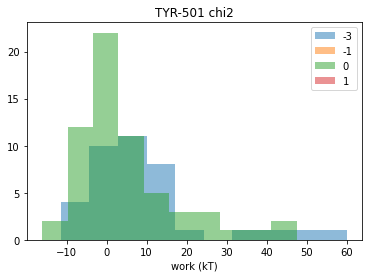

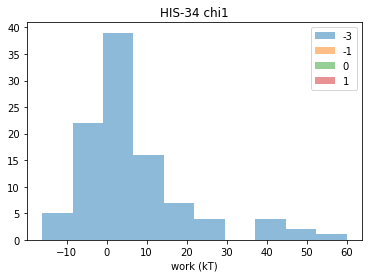

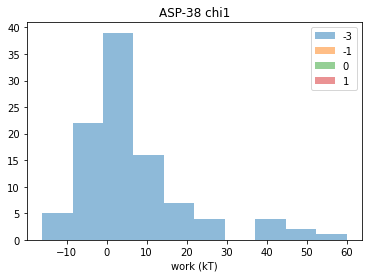

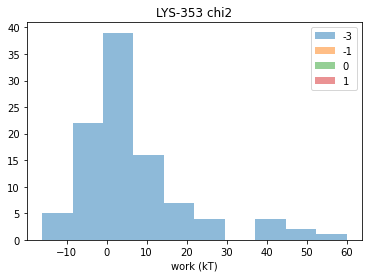

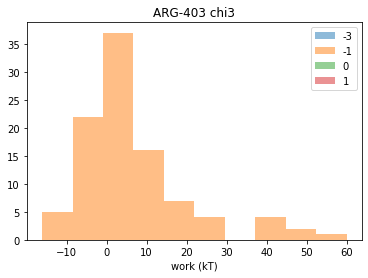

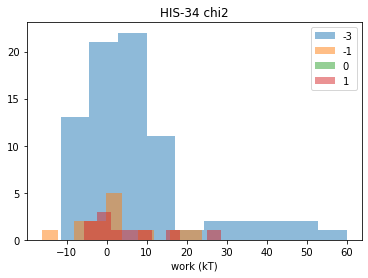

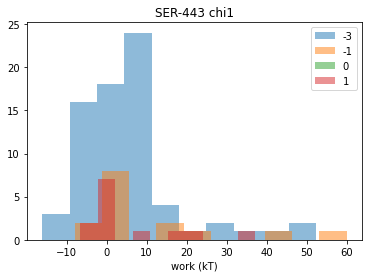

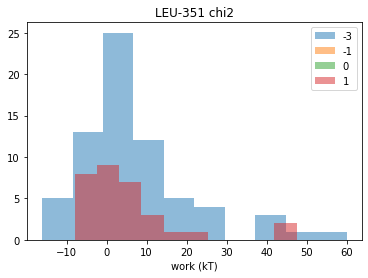

In [156]:
for res_name, angle_name, angle_type, angle_index in pairs:
    for k, v in d_clusters_neq_all[(res_name, angle_name)].items():
        plt.hist(d_works['complex']['forward'][v], alpha=0.5, label=k)
    plt.xlabel("work (kT)")
    plt.title(f"{res_name} {angle_name}")
    plt.legend()
    plt.show()

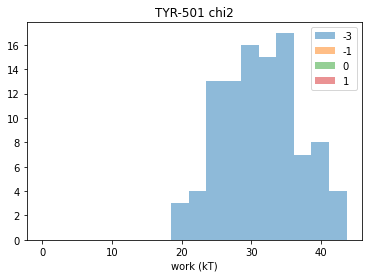

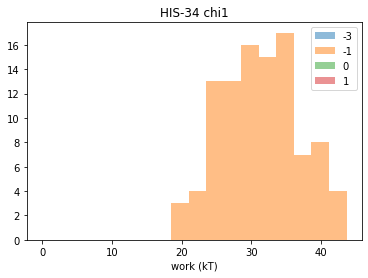

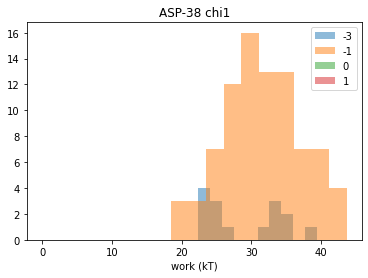

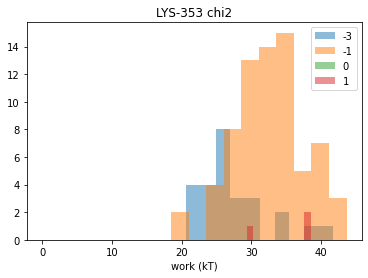

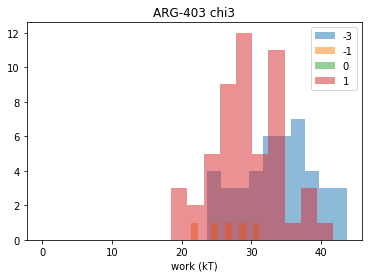

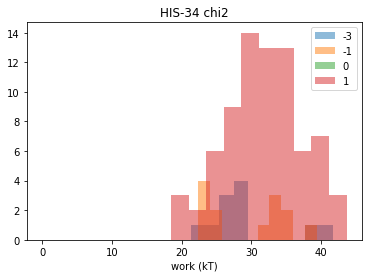

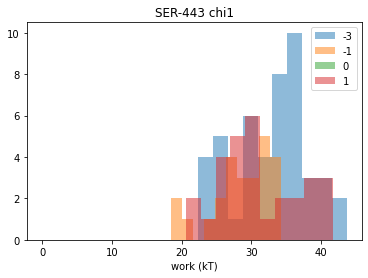

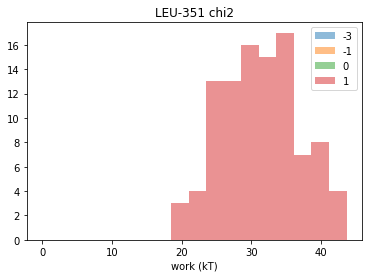

In [157]:
for res_name, angle_name, angle_type, angle_index in pairs:
    for k, v in d_clusters_rest_all[(res_name, angle_name)].items():
        plt.hist(d_works['complex']['reverse'][v], alpha=0.5, label=k)
    plt.xlabel("work (kT)")
    plt.title(f"{res_name} {angle_name}")
    plt.legend()
    plt.show()